In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [92]:
# Setting Params
pd.set_option('display.max_columns', None) # No maximum columns

In [93]:
df = pd.read_csv("Training.csv")

In [94]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.0,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,0.021951,0.389024,0.043902,0.021951,0.392683,0.023171,0.023171,0.023171,0.046341,0.092683,0.046341,0.092683,0.021951,0.023171,0.114634,0.276829,0.021951,0.091463,0.137805,0.021951,0.045122,0.230488,0.185366,0.115854,0.232927,0.234146,0.024390,0.046341,0.04

In [95]:
def count_per_column(df):
    for col in df.columns:
        print(f"---- {col} ---")
        print (df[col].value_counts())

In [96]:
count_per_column(df)

---- itching ---
itching
0    4242
1     678
Name: count, dtype: int64
---- skin_rash ---
skin_rash
0    4134
1     786
Name: count, dtype: int64
---- nodal_skin_eruptions ---
nodal_skin_eruptions
0    4812
1     108
Name: count, dtype: int64
---- continuous_sneezing ---
continuous_sneezing
0    4698
1     222
Name: count, dtype: int64
---- shivering ---
shivering
0    4812
1     108
Name: count, dtype: int64
---- chills ---
chills
0    4122
1     798
Name: count, dtype: int64
---- joint_pain ---
joint_pain
0    4236
1     684
Name: count, dtype: int64
---- stomach_pain ---
stomach_pain
0    4698
1     222
Name: count, dtype: int64
---- acidity ---
acidity
0    4698
1     222
Name: count, dtype: int64
---- ulcers_on_tongue ---
ulcers_on_tongue
0    4812
1     108
Name: count, dtype: int64
---- muscle_wasting ---
muscle_wasting
0    4812
1     108
Name: count, dtype: int64
---- vomiting ---
vomiting
0    3006
1    1914
Name: count, dtype: int64
---- burning_micturition ---
burning_mictu

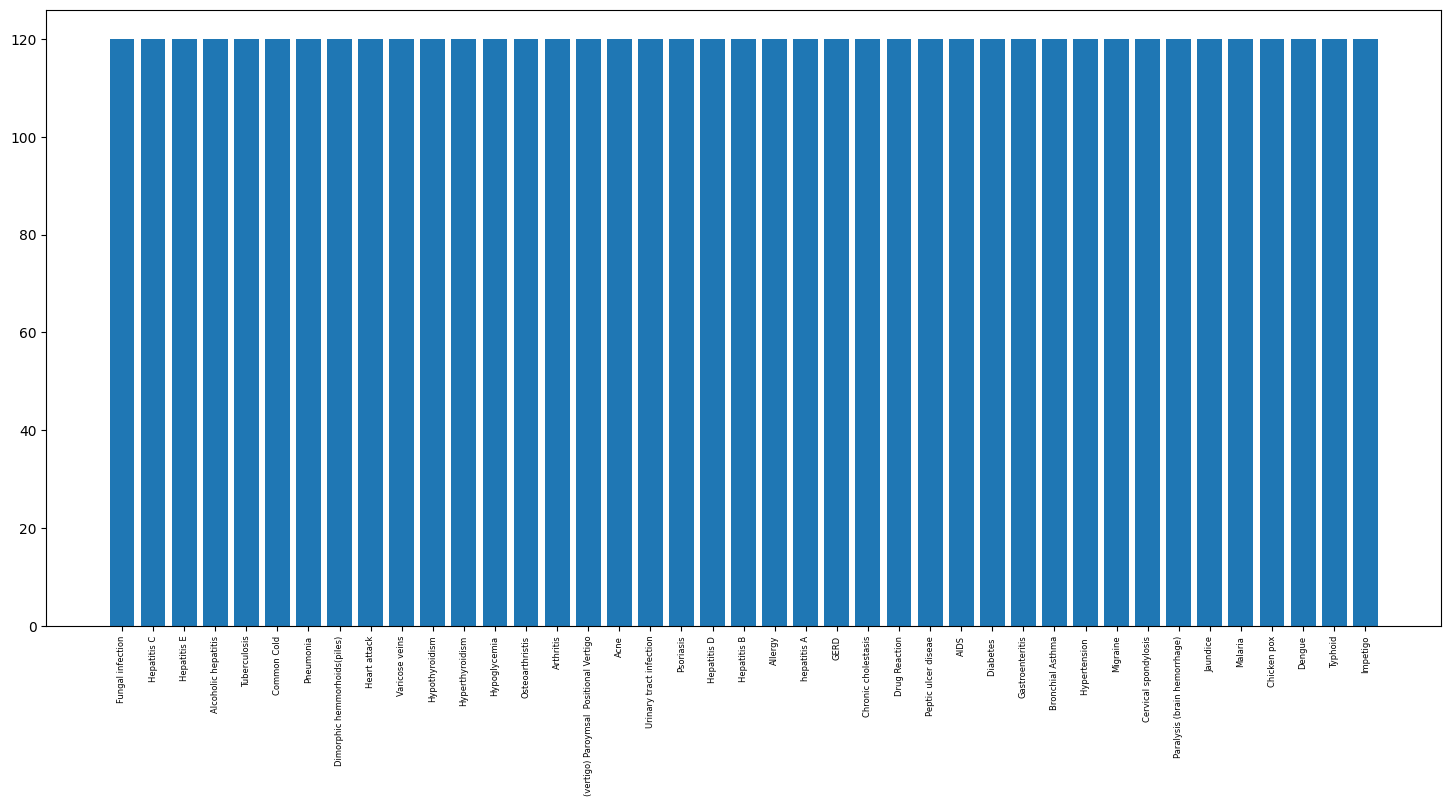

In [97]:
y_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": y_counts.index,
    "Counts": y_counts.values
})
plt.figure(figsize = (18,8))
plt.bar(x=temp_df["Disease"],height=temp_df["Counts"])
plt.xticks(fontsize=6,rotation=90)  # Rotate for better readability
plt.show()  # Show the plot

In [98]:
# Preprocessing
df.drop(["fluid_overload","Unnamed: 133"],axis=1,inplace=True)

In [99]:
le = LabelEncoder()
le.fit(df["prognosis"])
y_numerical = le.transform(df["prognosis"])
hot_enc = OneHotEncoder(handle_unknown='ignore')

# Reshape the data to 2D array
X = df["prognosis"].values.reshape(-1, 1)

# Fit and transform with OneHotEncoder
hot_enc.fit(X)
hot_data = hot_enc.transform(X)
hot_data_array = hot_data.toarray()

# LabelBinarizer
lb = LabelBinarizer()
lb_array = lb.fit_transform(df["prognosis"])

# Check if both arrays are the same
print("OneHotEncoder result:")
print(hot_data_array)
print("LabelBinarizer result:")
print(lb_array)

# Compare flattened arrays for equality
if np.array_equal(hot_data_array, lb_array):
    print("The two encodings are identical.")
else:
    print("The two encodings are different.")

OneHotEncoder result:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
LabelBinarizer result:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
The two encodings are identical.


In [100]:
x = df.drop("prognosis",axis=1)
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(
    x, y_numerical, test_size=0.33, random_state=42)
X_hot_train, X_hot_test, y_hot_train, y_hot_test = train_test_split(
    x, hot_data_array, test_size=0.33, random_state=42)
X_bini_train, X_bini_test, y_bini_train, y_bini_test = train_test_split(
    x, lb_array, test_size=0.33, random_state=42)

print(f"Train: {X_num_train.shape}, {y_num_train.shape}")
print(f"Test: {X_num_test.shape}, {y_num_test.shape}")
print(f"Train: {X_hot_train.shape}, {y_hot_train.shape}")
print(f"Test: {X_hot_test.shape}, {y_hot_test.shape}")
print(f"Train: {X_bini_train.shape}, {y_bini_train.shape}")
print(f"Test: {X_bini_test.shape}, {y_bini_test.shape}")

Train: (3296, 131), (3296,)
Test: (1624, 131), (1624,)
Train: (3296, 131), (3296, 41)
Test: (1624, 131), (1624, 41)
Train: (3296, 131), (3296, 41)
Test: (1624, 131), (1624, 41)


In [129]:
# Model Creation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
one_vs_rest= OneVsRestClassifier(LogisticRegression())

In [134]:
# Model Evaluation
cross_val_results = cross_val_score(one_vs_rest, X_bini_train,y_bini_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

cross_val_results = cross_val_score(one_vs_rest, X_hot_train,y_hot_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Cross-Validation Results (Accuracy): [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [135]:

cross_val_results = cross_val_score(one_vs_rest, X_num_train,y_num_train, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

one_vs_rest.fit(X_num_train,y_num_train)
num_pred = one_vs_rest.predict(X_num_test)

accuracy_num = accuracy_score(y_num_test,num_pred)
accuracy_num

Cross-Validation Results (Accuracy): [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


1.0

In [136]:
one_vs_rest.fit(X_bini_train, y_bini_train)

# Predict on test set
y_pred = one_vs_rest.predict(X_bini_test)

accuracy = accuracy_score(y_bini_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000
